# Neural network classifiers

### Activation functions


$$
ReLU(x) = 
\begin{cases}
0 &\mbox{if } x < 0 \\
x &\mbox{if } x \geq 0
\end{cases}
$$

$$
Softmax(x)_i = \frac{e^{x_i}}{\sum_i e^{x_i}}
$$



In [2]:
import tensorflow as tf
import numpy as np

from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from matplotlib import pyplot as plt
from random import randint
from tensorflow.keras.utils import to_categorical

## Preparing the data

In [3]:
# Preparing the dataset
# Setup train and test splits
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Making a copy before flattening for the next code-segment which displays images
x_train_drawing = x_train

print(x_train.shape) # (60000, 28, 28)
print(y_train.shape) # (60000,) 

# Convert class vectors to binary class matrices
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 10s 1us/step
(60000, 28, 28)
(60000,)


In [4]:
# Normalize the images.
x_train = (x_train / 255) - 0.5
x_test = (x_test / 255) - 0.5

# Flatten the images.
x_train = x_train.reshape((-1, 784))
x_test = x_test.reshape((-1, 784))

print(x_train.shape) # (60000, 784)
print(x_test.shape)  # (10000, 784)

(60000, 784)
(10000, 784)


## A look at some random digits

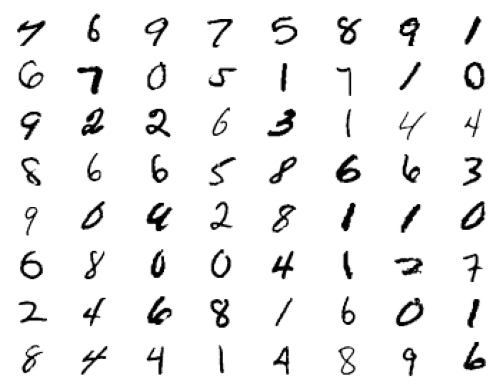

In [5]:
for i in range(64):
    ax = plt.subplot(8, 8, i+1)
    ax.axis('off')
    plt.imshow(x_train_drawing[randint(0, x_train.shape[0])], cmap='Greys')

## Building the model

In [6]:
model = Sequential([
  # layers...
    
]),

In [7]:
model = Sequential([
  Dense(64, activation='relu'),
  Dense(64, activation='relu'),
  Dense(10, activation='softmax'),
]),

In [8]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(784,)),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax'),
])

C:\Users\Geoffrey\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Compiling the model

In [9]:
# Compile model
model.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

## Training and evaluating the model

In [10]:
print (tf.__version__)

2.16.1


Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8060 - loss: 0.6394 - val_accuracy: 0.9427 - val_loss: 0.2041
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9320 - loss: 0.2199 - val_accuracy: 0.9570 - val_loss: 0.1446
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9499 - loss: 0.1615 - val_accuracy: 0.9640 - val_loss: 0.1248
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9601 - loss: 0.1267 - val_accuracy: 0.9687 - val_loss: 0.1049
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9659 - loss: 0.1124 - val_accuracy: 0.9697 - val_loss: 0.1067
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9683 - loss: 0.0964 - val_accuracy: 0.9717 - val_loss: 0.1002
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9732 - loss: 0.0851 - val_accuracy: 0.9735 - val_loss: 0.0969
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9739 - loss: 0.0805 - 

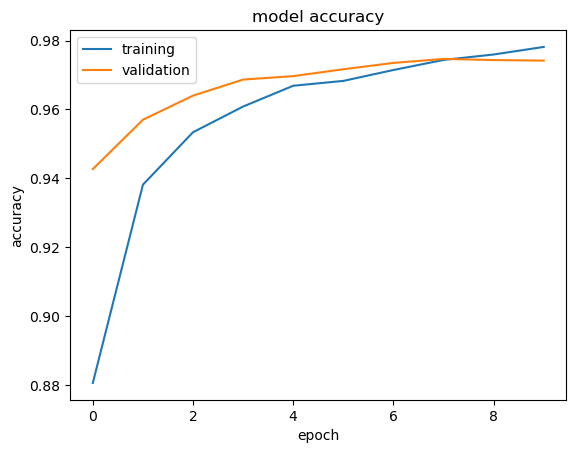

Test loss: 0.106
Test accuracy: 0.969


In [11]:
# Training the model
history = model.fit(x_train, y_train, batch_size=32, epochs=10, verbose=True, validation_split=0.1)

# Evaluating the model
loss, accuracy  = model.evaluate(x_test, y_test, verbose=False)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

## Making predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


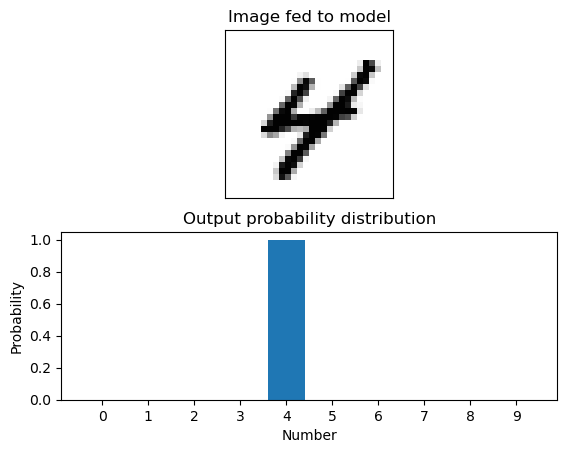

Top prediction: 4


In [12]:
# select an image at random to feed to our model
idx = np.random.randint(len(x_train))

prediction = model.predict(x_train[[idx]])[0]

fig, ax = plt.subplots(2, 1)

ax[0].imshow(x_train_drawing[idx], cmap='Greys')
ax[0].set_xticks(())
ax[0].set_yticks(())
ax[0].set_title('Image fed to model')

ax[1].bar(range(0, 10), prediction)
ax[1].set_xticks(range(0, 10))
ax[1].set_xlabel('Number')
ax[1].set_ylabel('Probability')
ax[1].set_title('Output probability distribution')

plt.show()

print(f'Top prediction: {prediction.argmax()}')